# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reads in the dataset from Google Drive location
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

#### Observations:

Provided the specific file path to foodhub_order.csv data to be read.

In [5]:
# Returns the first 5 rows from dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

Using df.head() will return the first 5 rows from dataset. Additional rows can be displayed if an integer was passed into the parenthesis.  

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Returns the number of rows and columns in the dataset
df.shape

(1898, 9)

#### Observations:

Using the df.shape attritbute I am able to return the numbers of rows and columns within my dataset. This is an important first step in getting a basic understanding of the makeup and structure of a dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Provides a summary of the datatypes included in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

Based on the output of df.info(), the datatypes found in this dataset are: Integer, object String, and Float.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Checks for missing values in the dataset
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:

By running df.isnull().sum() I have confirmed there are no missing values. This is an important step as it confirms that the dataset is complete.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# A statistical summary of the data.
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

The Minimum time is 20 minutes, the Average time is approx. 27 minutes, and the Maximum time is 35 minutes. This is an important step in gaining a better understanding of the dataset and identifying areas for further investigation. For example with a seemingly small std of 4.6 food prep time, and 5 delivery time suggests that both food prep time and delivery time are fairly consistent. What stands out is that the lowest priced order still took around the same prep and delivery times as higher-priced orders.


### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Returns and prints a count how many orders are not rated
not_rated_count = df[df['rating'] == 'Not given'].shape[0]
print(not_rated_count)

736


#### Observations:

Because the dataset has a string value of 'Not given' for orders that were not rated checking for null values using df.isnull().sum() was an insufficient solution to gain a count. I have identified that 736 customers did not rate their orders; this could be an important piece of information to consider in future analysis. With almost 39 percent of customers not providing feedback there appears to be a significant gap in completeness of our ratings data.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

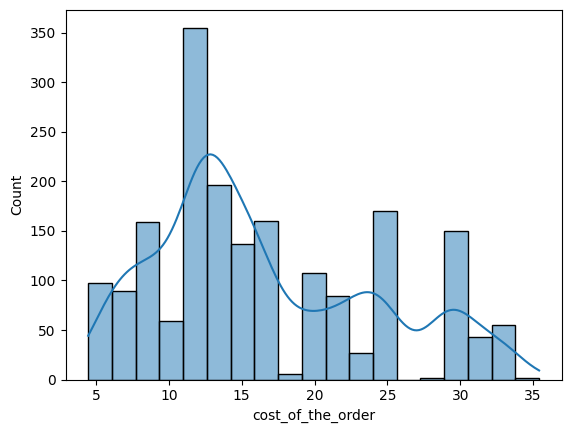

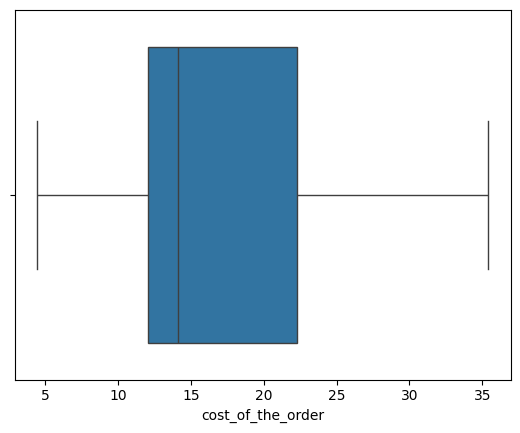

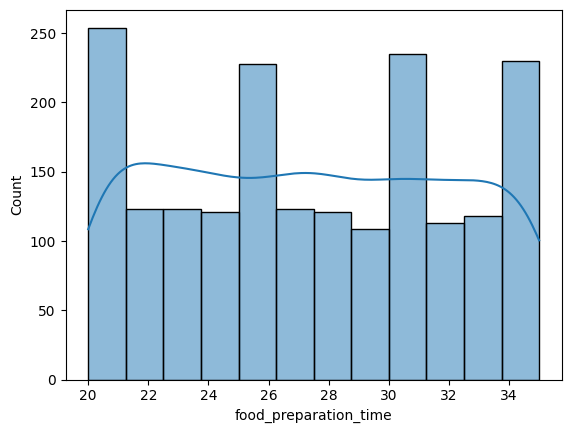

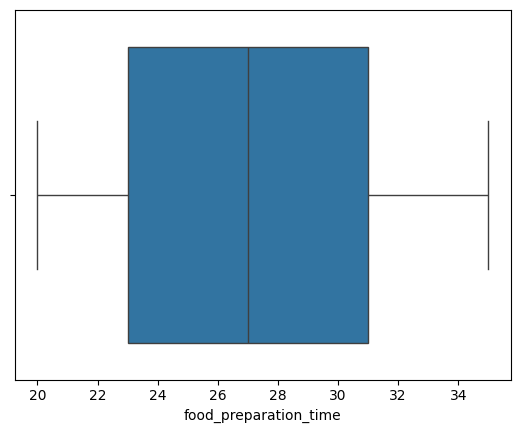

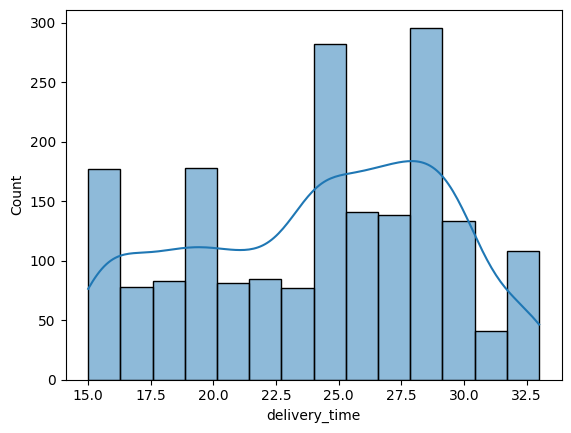

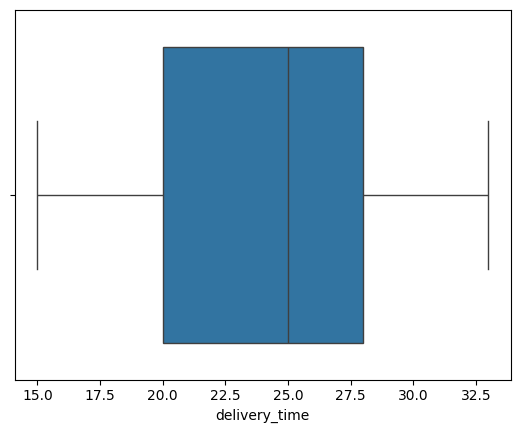

In [11]:

# Univariate Analysis for Numeric Variables

# cost_of_the_order
sns.histplot(df["cost_of_the_order"], kde=True)   # Histogram of order cost
plt.show()
sns.boxplot(x=df["cost_of_the_order"])            # Boxplot of order cost
plt.show()

# food_preparation_time
sns.histplot(df["food_preparation_time"], kde=True)   # Histogram of prep time
plt.show()
sns.boxplot(x=df["food_preparation_time"])            # Boxplot of prep time
plt.show()

# delivery_time
sns.histplot(df["delivery_time"], kde=True)   # Histogram of delivery time
plt.show()
sns.boxplot(x=df["delivery_time"])            # Boxplot of delivery time
plt.show()

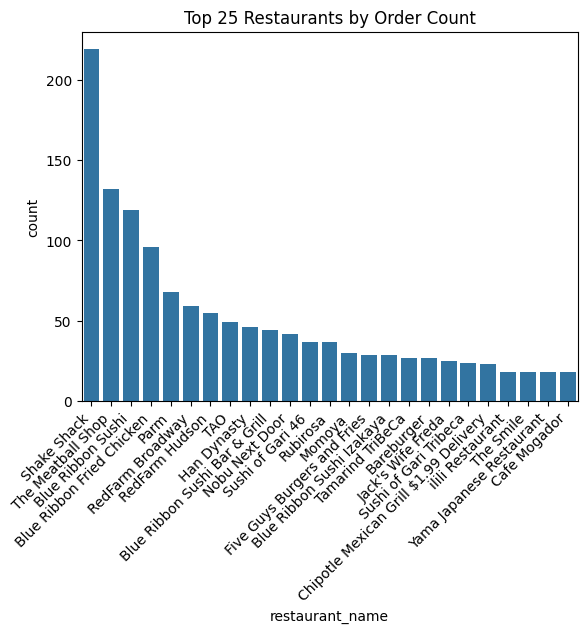

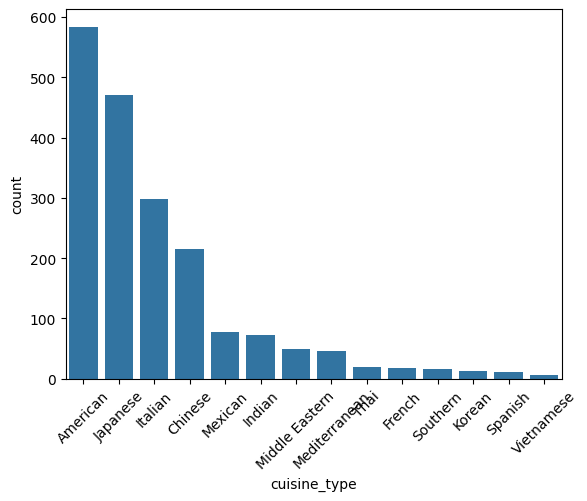

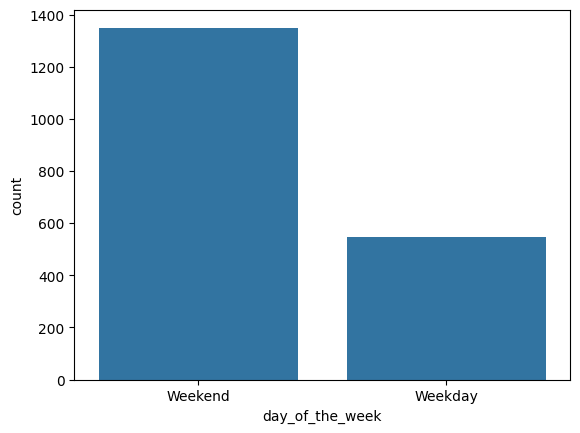

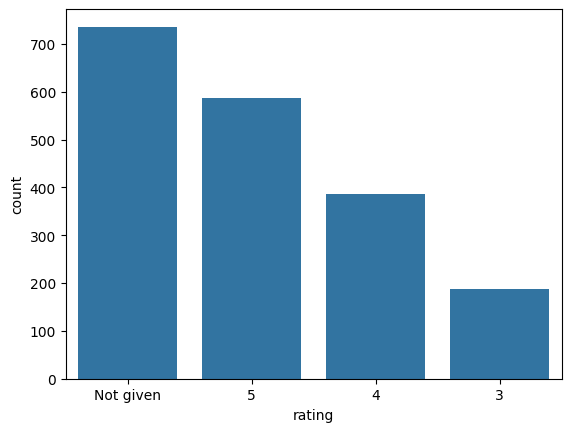

In [12]:
# # Univariate Analysis for Categorical Variables

# Top 25 restaurants
top_restaurants = df["restaurant_name"].value_counts().head(25).index
sns.countplot(x="restaurant_name", data=df[df["restaurant_name"].isin(top_restaurants)], order=top_restaurants)
plt.xticks(rotation=45, ha="right")
plt.title("Top 25 Restaurants by Order Count")
plt.show()


# cuisine_type
sns.countplot(x="cuisine_type", data=df, order=df["cuisine_type"].value_counts().index)
plt.xticks(rotation=45)
plt.show()

# day_of_the_week
sns.countplot(x="day_of_the_week", data=df)
plt.show()

# rating
sns.countplot(x="rating", data=df, order=df["rating"].value_counts().index)
plt.show()

#### Observations:

**Numerical:**
The dataset shows that most orders fall within a moderate cost range, typically between 10 and 15 dollars , though there are higher-priced outliers that skew the distribution to the right. This suggests a small segment of “big spenders” that could be valuable for targeted promotions. Food preparation times are fairly consistent, spread between 20 and 35 minutes, with a narrow interquartile range indicating reliable kitchen performance across most orders. Delivery times range from 15 to 33 minutes, clustering around the mid-20s, which highlights a predictable delivery experience for the majority of customers.

**Categorical:**
Orders are concentrated among a few popular restaurants, with Shake Shack leading the pack, though the dataset includes a wide variety of establishments. American, Japanese, and Italian cuisines dominate, with Chinese and Mexican following, while many other cuisines appear only sporadically — pointing to menu imbalance that may influence overall averages. Most orders occur on weekends rather than weekdays, showing a demand spike that operators could prepare for with staffing or inventory adjustments. Customer ratings are skewed by many missing values, but among those provided, reviews trend strongly positive: 5-star reviews are most common, followed by 4- and 3-stars, with no evidence of very low ratings. This suggests either genuine customer satisfaction or possible reporting bias, since dissatisfied customers may be less likely to submit ratings.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [13]:
# Write the code here
df["restaurant_name"].value_counts().head(5).to_frame("count").assign(percentage=lambda x: (x["count"]/len(df)*100).round(2))

,count,percentage
restaurant_name,,
Shake Shack,219,11.54
The Meatball Shop,132,6.95
Blue Ribbon Sushi,119,6.27
Blue Ribbon Fried Chicken,96,5.06
Parm,68,3.58


#### Observations:

Shake Shack is the most popular with 219 orders, followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. Together, these top 5 restaurants make up about one-third of all orders in the dataset.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [14]:
# Write the code here
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)

,count
cuisine_type,
American,415


#### Observations:

American food is the most popular cuisine on weekends, with 415 orders. This shows a strong preference for American cuisine compared to other types during weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [15]:
# Write the code here
df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0] * 100

print(f"{round(df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0] * 100, 2)}%")

29.24%


#### Observations:

About 29.24% of orders cost more than 20 dollars. This means that most orders (around 70%) are under 20 dollars, suggesting that customers usually prefer lower-cost meals.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [16]:
# Write the code here
df['delivery_time'].mean()

print(f"The mean order delivery time is {round(df['delivery_time'].mean(), 2)} minutes.")

The mean order delivery time is 24.16 minutes.


#### Observations:

The mean delivery time is about 24 minutes. This indicates that, on average, customers can expect their orders within a half-hour window, showing consistent delivery performance.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [17]:
# Write the code here
df['customer_id'].value_counts().head(3)

print("The top 3 most frequent customers are:")
print(df['customer_id'].value_counts().head(3))

The top 3 most frequent customers are:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:

The top customers are 52832, 47440, and 83287 with 13, 10, and 9 orders. These customers order more often than others, so they can be seen as loyal. Giving them vouchers is a good way to reward and keep them.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


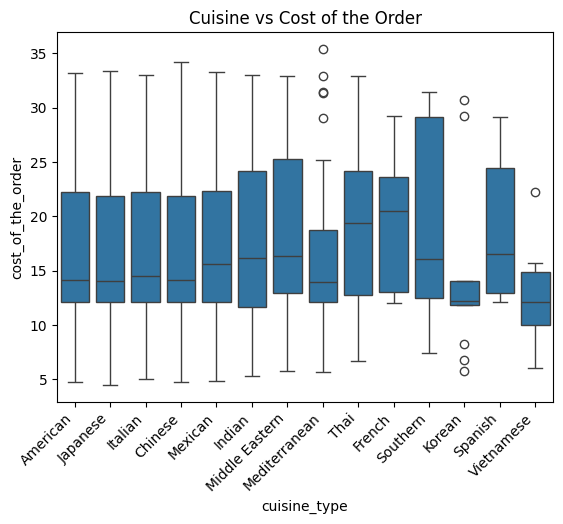

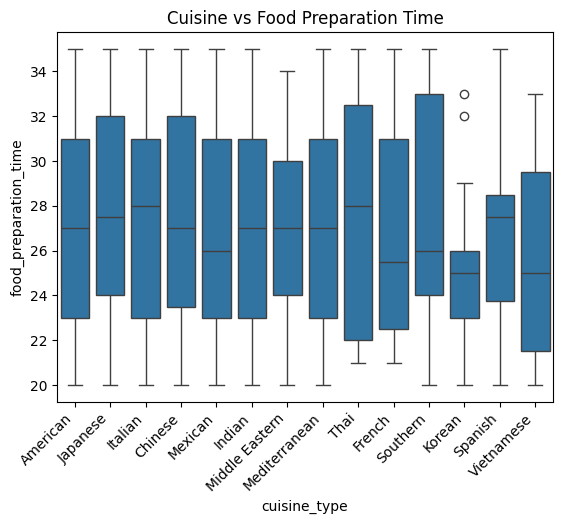

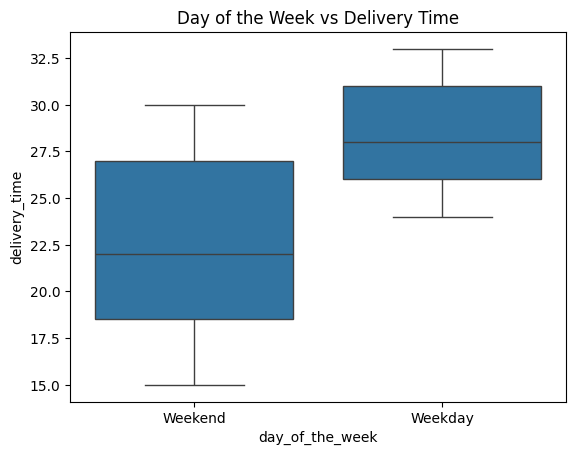

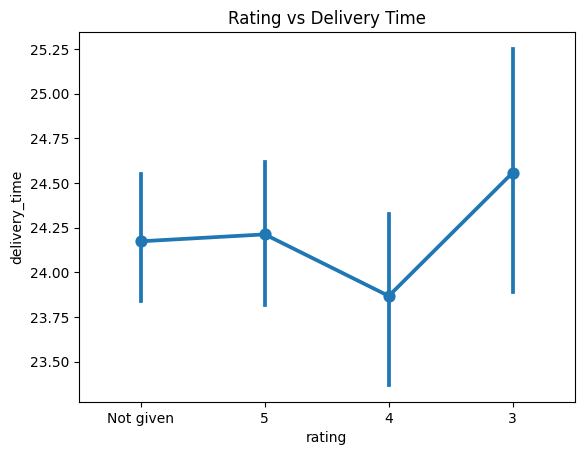

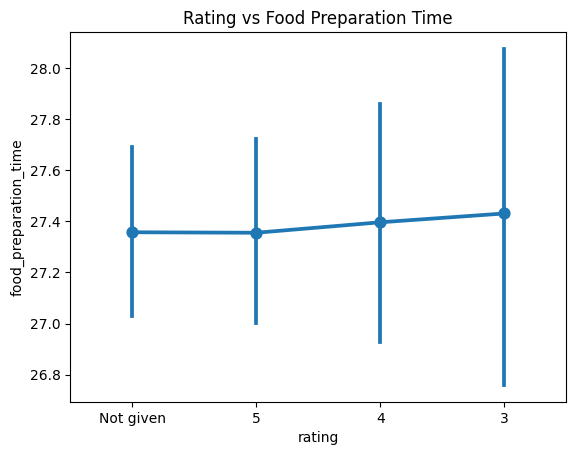

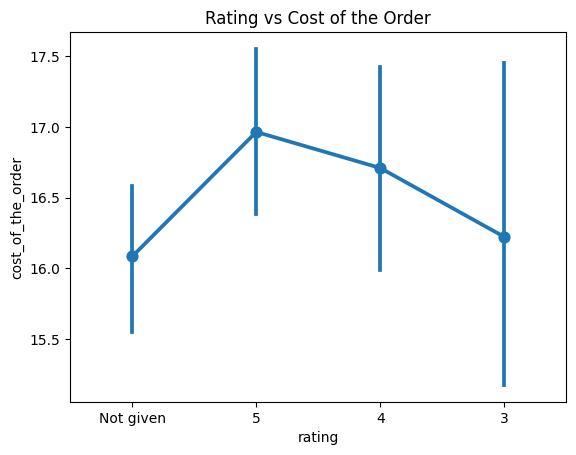

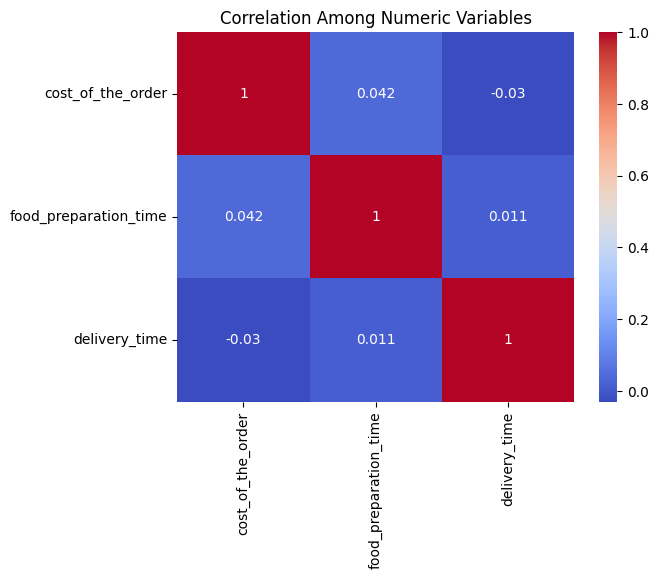

In [18]:
# Multivariate Analysis

# Cuisine vs Cost of the order
sns.boxplot(x="cuisine_type", y="cost_of_the_order", data=df, order=df["cuisine_type"].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title("Cuisine vs Cost of the Order")
plt.show()

# Cuisine vs Food Preparation Time
sns.boxplot(x="cuisine_type", y="food_preparation_time", data=df, order=df["cuisine_type"].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title("Cuisine vs Food Preparation Time")
plt.show()

# Day of the Week vs Delivery Time
sns.boxplot(x="day_of_the_week", y="delivery_time", data=df)
plt.title("Day of the Week vs Delivery Time")
plt.show()

# Rating vs Delivery Time
sns.pointplot(x="rating", y="delivery_time", data=df, order=df["rating"].value_counts().index)
plt.title("Rating vs Delivery Time")
plt.show()

# Rating vs Food Preparation Time
sns.pointplot(x="rating", y="food_preparation_time", data=df, order=df["rating"].value_counts().index)
plt.title("Rating vs Food Preparation Time")
plt.show()

# Rating vs Cost of the Order
sns.pointplot(x="rating", y="cost_of_the_order", data=df, order=df["rating"].value_counts().index)
plt.title("Rating vs Cost of the Order")
plt.show()

# Correlation among numeric variables
sns.heatmap(df[["cost_of_the_order","food_preparation_time","delivery_time"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Among Numeric Variables")
plt.show()

#### Observations:

Cuisine clearly influences both cost and preparation time. Mediterranean and French meals tend to be priced higher, while Korean and Vietnamese meals are generally more affordable. Prep times are steady across most cuisines, but a few — like French and Thai — show greater variability, suggesting some menu items are more complex than others.

Delivery time varies more by the day of the week than by cuisine. Weekday deliveries run slightly longer than weekend ones, likely reflecting traffic or order volume patterns.

Ratings appear largely unaffected by prep or delivery times, indicating that customers may be more tolerant of modest delays. However, higher-cost orders are linked with slightly better ratings, perhaps because premium meals carry higher expectations and deliver more satisfaction.

Correlation analysis confirms that cost, prep time, and delivery time do not strongly move together. In practical terms, reducing delivery time won’t necessarily affect prep time, and higher costs don’t inherently extend prep duration. Each factor seems to operate independently, pointing to distinct levers for improving efficiency and customer experience.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [19]:
# Filter out rows where rating was not given
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype(int)

# Create a dataframe with restaurant names and their rating counts
df_rating_count = df_rated.groupby('restaurant_name')['rating'].count().reset_index()
df_rating_count = df_rating_count.rename(columns={'rating': 'rating_count'})

# Get restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating_count'] > 50]['restaurant_name']

# Filter dataset to only include these restaurants
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group by restaurant name and calculate mean rating
df_mean_4_rating = df_mean_4.groupby('restaurant_name')['rating'].mean().reset_index()
df_mean_4_rating = df_mean_4_rating.rename(columns={'rating': 'avg_rating'})

# Filter restaurants with average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['avg_rating'] > 4].sort_values(by='avg_rating', ascending=False)

# Display the eligible restaurants
df_avg_rating_greater_than_4


,restaurant_name,avg_rating
3,The Meatball Shop,4.511905
0,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
1,Blue Ribbon Sushi,4.219178


#### Observations:

The results highlight restaurants that are both popular and well-liked, with a strong base of customer feedback and high average ratings. The eligible group includes The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi, all of which stand out as reliable choices for promotion because they combine high customer approval with consistent performance.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [20]:
# Surcharge rate per order: >$20 -> 25%; >$5 -> 15%; otherwise 0
rate = np.where(df["cost_of_the_order"] > 20, 0.25,
        np.where(df["cost_of_the_order"] > 5, 0.15, 0.00))

net_revenue = (rate * df["cost_of_the_order"]).sum()   # sum commission across orders
print(f"Net revenue across all orders: ${net_revenue:,.2f}")

Net revenue across all orders: $6,166.30


#### Observations:

Most orders fall between 5 and 20 dollars, which means a large share of revenue comes from the 15% commission bracket. Higher-priced orders above 20 dollars are less common but contribute more per order since they are charged at 25%. Together, both brackets add up to a significant total revenue of about 6,166 dollars, showing how the mix of frequent low-cost orders and fewer high-cost orders both play an important role in the company’s earnings.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [21]:
# Total time per order and share that exceed 60 minutes
total_time = df["food_preparation_time"] + df["delivery_time"]      # end-to-end time
pct_over_60 = ((total_time > 60).mean() * 100).round(2)             # percent of orders > 60
print(f"Orders taking > 60 minutes: {pct_over_60}%")

Orders taking > 60 minutes: 10.54%


#### Observations:

Only about 10% of orders take longer than 60 minutes from placement to delivery. Since preparation times usually range between 20 and 35 minutes and delivery times between 15 and 33 minutes, most combinations stay under an hour. The few cases that cross the 60-minute mark likely reflect situations where both prep and delivery run on the longer side, but overall the majority of customers receive their orders within a reasonable timeframe.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [22]:
# Mean delivery time by day type (Weekday vs Weekend)
mean_delivery = df.groupby("day_of_the_week")["delivery_time"].mean().reset_index()
mean_delivery

,day_of_the_week,delivery_time
0,Weekday,28.340037
1,Weekend,22.470022


#### Observations:

The average delivery time is noticeably longer on weekdays than on weekends. On weekdays, deliveries take about 28 minutes on average, compared to closer to 22 minutes on weekends. This suggests that customers generally receive their orders more quickly during weekends, possibly due to lighter traffic conditions or fewer competing weekday orders.


### Conclusion and Recommendations

Weekday delivery services face modest but consistent delays, likely linked to higher traffic congestion or order volumes. To close the gap, the company could add drivers during peak weekday hours, optimize delivery routes, or use demand forecasting to better align staffing with expected order spikes. These changes would help bring weekday delivery performance closer to weekend levels, improving consistency in customer experience.

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

The analysis shows that the majority of customers lean toward affordable meals under $20, with American, Japanese, and Italian cuisines driving the largest share of orders, especially on weekends. Premium cuisines like Mediterranean and French are less common but trend higher in both cost and prep variability, while Korean and Vietnamese meals emerge as quicker, lower-cost alternatives. Delivery performance is generally reliable, though slightly slower on weekdays, pointing to operational pressure during the workweek. Ratings remain broadly positive and climb modestly with higher-priced orders, while prep and delivery times within normal ranges show little direct impact on customer satisfaction.

### Recommendations:

To act on these insights, operators should focus on narrowing weekday delivery gaps through better staffing or logistics, while reinforcing popular cuisines with targeted marketing to build on existing demand. Bundling or upsell strategies can help lift order values, as higher-cost meals already align with stronger ratings. Loyalty programs aimed at repeat buyers offer a pathway to deepen retention, and improving feedback collection—through prompts at checkout or follow-up reminders—would reduce missing ratings and strengthen the quality of customer insights for ongoing optimization.

---